# Gaussian mixture model using EM algorithm

$$\gamma_i = \frac{p*f_2(y_{i})}{p*f_2(y_{i}) + (1-p)*f_1(y_{i})}$$

$$\mu_2 = \frac{\sum_{i=1}^{n} \gamma_{i}*y_{i}}{\sum_{i=1}^{n} \gamma_{i}}$$
$$\mu_1 = \frac{\sum_{i=1}^{n} (1-\gamma_{i})*y_{i}}{\sum_{i=1}^{n} (1-\gamma_{i})}$$

$$\sigma_2^{2} = \frac{\sum_{i=1}^{n} \gamma_{i}*(y_{i} - \hat{\mu_1})^{2}}{\sum_{i=1}^{n} \gamma_{i}}$$
$$\sigma_1^{2} = \frac{\sum_{i=1}^{n} (1-\gamma_{i})*(y_{i} - \hat{\mu_1})^{2}}{\sum_{i=1}^{n} (1-\gamma_{i})}$$

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import warnings 
warnings.simplefilter("ignore")

In [160]:
## Data generation
np.random.seed(13)
y1 = np.random.normal(loc=0, scale=1, size=100)
y2 = np.random.normal(loc=10, scale=1, size=100)

y = np.zeros(100)
no_zeros = 0
for i in range(100):
    if np.random.randint(2):
        y[i] = y1[i]
    else:
        no_zeros += 1
        y[i] = y2[i]
        
print(no_zeros/y.shape[0])

0.59


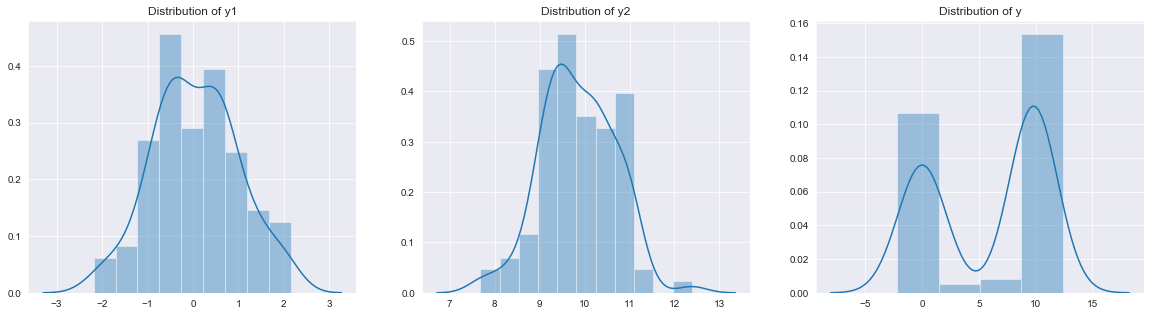

In [161]:
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(20,5))

ax[0] = sns.distplot(y1, ax=ax[0])
ax[0].set_title("Distribution of y1")

ax[1] = sns.distplot(y2, ax=ax[1])
ax[1].set_title("Distribution of y2")

ax[2] = sns.distplot(y, ax=ax[2])
ax[2].set_title("Distribution of y")

plt.show()

In [165]:
class EM_GMM:
    """
    a simple excercise to see to check the working of a simple 2 sample scalar GMM
    using EM algorithm
    """
    def __init__(self, y, maxiter=100, verbose=False):
        self.y = y
        self.epochs = maxiter
        self.err = np.zeros(self.epochs)
        self.verbose = verbose
    
    def distribution(self, x, mu=0, var=1):
        return 1/np.sqrt(2*np.pi*var) * np.exp(-1*(x-mu)**2/(2*var))
    
    def update_mu(self, gamma, y):
        num = np.dot(gamma, y)
        den = np.sum(gamma)
        return num/den
    
    def update_var(self, gamma, y, mu):
        res = self.y - mu
        num = np.dot(gamma, res**2)
        den = np.sum(gamma)
        return num/den    

    def run(self):
        mu1, mu2 = self.y[0],self.y[1]
        var1, var2 = np.std(self.y)**2, np.std(self.y)**2
        p = 0.5
        gamma = np.zeros(len(self.y))
        for _ in range(self.epochs):
            for i in range(len(self.y)):
                gamma[i] = (p) * self.distribution(self.y[i], mu2, var2)/(p * self.distribution(self.y[i], mu2, var2) + 
                                                                        (1-p) * self.distribution(self.y[i], mu1, var1))
            mu1 = self.update_mu(1-gamma, self.y)
            mu2 = self.update_mu(gamma, self.y)
            var1 = self.update_var(1-gamma, self.y, mu1)
            var2 = self.update_var(gamma, self.y, mu2)
            p = np.sum(gamma)/len(self.y)
            
            if _ % 5 == 0 and self.verbose:
                print(_,": ", p)
        return (mu1,mu2,var1,var2,p)

In [172]:
gmm1 = EM_GMM(y)
mu1,mu2,var1,var2,p = gmm1.run()
print("mu1, var1: {:.2f}, {:.2f} \nmu2, var2: {:.2f}, {:.2f}\np: {:.4f}".format(mu1,var1,mu2,var2,p))

mu1, var1: 0.00, 0.79 
mu2, var2: 9.83, 0.66
p: 0.5900
